# Description of Dataset 
- This project focuses on analyzing sales data from a bike store. The dataset contains detailed information about orders, including customer details, locations, order dates, product information, revenue, and sales representatives.
- The goal of this analysis is to extract valuable insights regarding customer purchasing behaviors, product performance, and store profitability, ultimately supporting data-driven decision-making to improve sales strategies and market positioning.


In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [319]:
data = pd.read_csv("/kaggle/input/bikes-data/BikeStores.csv")
data.head()

,order_id,customers,city,state,order_date,total_units,revenue,product_name,category_name,brand_name,store_name,sales_rep
0,1,Johnathan Velazquez,Pleasanton,CA,1/1/2016,2,1199.98,Electra Townie Original 7D EQ - 2016,Cruisers Bicycles,Electra,Santa Cruz Bikes,Mireya Copeland
1,1,Johnathan Velazquez,Pleasanton,CA,1/1/2016,1,599.99,Electra Townie Original 7D EQ - Women's - 2016,Cruisers Bicycles,Electra,Santa Cruz Bikes,Mireya Copeland
2,1,Johnathan Velazquez,Pleasanton,CA,1/1/2016,2,3098.00,Surly Straggler - 2016,Cyclocross Bicycles,Surly,Santa Cruz Bikes,Mireya Copeland
3,1,Johnathan Velazquez,Pleasanton,CA,1/1/2016,1,2899.99,Trek Fuel EX 8 29 - 2016,Mountain Bikes,Trek,Santa Cruz Bikes,Mireya Copeland
4,1,Johnathan Velazquez,Pleasanton,CA,1/1/2016,2,3599.98,Trek Remedy 29 Carbon Frameset - 2016,Mountain Bikes,Trek,Santa Cruz Bikes,Mireya Copeland


# Data Cleaning & Exploration

In [320]:
data.shape

(4722, 12)

In [321]:
data.duplicated().sum()

0

In [322]:
data.isnull().sum()

order_id         0
customers        0
city             0
state            0
order_date       0
total_units      0
revenue          0
product_name     0
category_name    0
brand_name       0
store_name       0
sales_rep        0
dtype: int64

In [323]:
data.describe()

,order_id,total_units,revenue
count,4722.000000,4722.000000,4722.000000
mean,821.265354,1.498941,1816.812554
std,465.152168,0.500052,2228.160984
min,1.000000,1.000000,89.990000
25%,423.250000,1.000000,539.980000
50%,828.500000,1.000000,939.980000
75%,1226.000000,2.000000,1999.980000
max,1615.000000,2.000000,23999.980000


In [324]:
data.dtypes

order_id           int64
customers         object
city              object
state             object
order_date        object
total_units        int64
revenue          float64
product_name      object
category_name     object
brand_name        object
store_name        object
sales_rep         object
dtype: object

In [325]:
data['state'].unique()

array(['CA', 'NY', 'TX'], dtype=object)

In [326]:
data['category_name'].value_counts()

category_name
Cruisers Bicycles      1378
Mountain Bikes         1183
Children Bicycles       782
Comfort Bicycles        537
Road Bikes              374
Cyclocross Bicycles     256
Electric Bikes          212
Name: count, dtype: int64

In [327]:
data['city'].value_counts()

city
Scarsdale              61
Mount Vernon           60
San Angelo             53
Ballston Spa           52
Canandaigua            50
                       ..
Middle Village          3
Yuba City               3
Springfield Gardens     3
Tonawanda               2
Westbury                2
Name: count, Length: 195, dtype: int64

In [328]:
data['order_date']

0         1/1/2016
1         1/1/2016
2         1/1/2016
3         1/1/2016
4         1/1/2016
           ...    
4717    28/11/2018
4718    28/11/2018
4719    28/12/2018
4720    28/12/2018
4721    28/12/2018
Name: order_date, Length: 4722, dtype: object

In [329]:
data['order_date'] = pd.to_datetime(df['order_date'], dayfirst=False)

In [330]:
data.dtypes

order_id                  int64
customers                object
city                     object
state                    object
order_date       datetime64[ns]
total_units               int64
revenue                 float64
product_name             object
category_name            object
brand_name               object
store_name               object
sales_rep                object
dtype: object

In [331]:
state_mapping = {
    'CA': 'California',
    'NY': 'New York',
    'TX': 'Texas'}

In [332]:
data['state'] = data['state'].map(state_mapping)

In [333]:
data.head()

,order_id,customers,city,state,order_date,total_units,revenue,product_name,category_name,brand_name,store_name,sales_rep
0,1,Johnathan Velazquez,Pleasanton,California,2016-01-01,2,1199.98,Electra Townie Original 7D EQ - 2016,Cruisers Bicycles,Electra,Santa Cruz Bikes,Mireya Copeland
1,1,Johnathan Velazquez,Pleasanton,California,2016-01-01,1,599.99,Electra Townie Original 7D EQ - Women's - 2016,Cruisers Bicycles,Electra,Santa Cruz Bikes,Mireya Copeland
2,1,Johnathan Velazquez,Pleasanton,California,2016-01-01,2,3098.00,Surly Straggler - 2016,Cyclocross Bicycles,Surly,Santa Cruz Bikes,Mireya Copeland
3,1,Johnathan Velazquez,Pleasanton,California,2016-01-01,1,2899.99,Trek Fuel EX 8 29 - 2016,Mountain Bikes,Trek,Santa Cruz Bikes,Mireya Copeland
4,1,Johnathan Velazquez,Pleasanton,California,2016-01-01,2,3599.98,Trek Remedy 29 Carbon Frameset - 2016,Mountain Bikes,Trek,Santa Cruz Bikes,Mireya Copeland


In [334]:
data['city'].unique()

array(['Pleasanton', 'Huntington Station', 'Patchogue', 'Duarte', 'Utica',
       'Baldwinsville', 'Bellmore', 'Saratoga Springs', 'San Carlos',
       'Yonkers', 'Auburn', 'San Diego', 'Niagara Falls', 'Torrance',
       'Carmel', 'Banning', 'Pomona', 'Coachella', 'Encino',
       'Canyon Country', 'Mount Vernon', 'Campbell', 'Santa Clara',
       'Floral Park', 'Baldwin', 'Wappingers Falls', 'Bronx',
       'Richmond Hill', 'Orchard Park', 'Merrick', 'Harlingen', 'Selden',
       'Buffalo', 'West Hempstead', 'West Islip', 'Woodside',
       'Long Beach', 'Saint Albans', 'Ithaca', 'Rego Park', 'Liverpool',
       'Hopewell Junction', 'Central Islip', 'Ossining', 'Shirley',
       'Corpus Christi', 'Elmhurst', 'Anaheim', 'Plainview',
       'Garden City', 'Rome', 'Rochester', 'Franklin Square', 'Atwater',
       'Monroe', 'Ridgecrest', 'Clifton Park', 'Far Rockaway',
       'Sugar Land', 'New Windsor', 'Bayside', 'Ballston Spa',
       'Port Washington', 'Glendora', 'Ronkonkoma', 'Sant

In [335]:
data['Year'] = data['order_date'].dt.year
data['Month'] = data['order_date'].dt.month
data['Day'] = data['order_date'].dt.day

In [336]:
data.head(3)

,order_id,customers,city,state,order_date,total_units,revenue,product_name,category_name,brand_name,store_name,sales_rep,Year,Month,Day
0,1,Johnathan Velazquez,Pleasanton,California,2016-01-01,2,1199.98,Electra Townie Original 7D EQ - 2016,Cruisers Bicycles,Electra,Santa Cruz Bikes,Mireya Copeland,2016,1,1
1,1,Johnathan Velazquez,Pleasanton,California,2016-01-01,1,599.99,Electra Townie Original 7D EQ - Women's - 2016,Cruisers Bicycles,Electra,Santa Cruz Bikes,Mireya Copeland,2016,1,1
2,1,Johnathan Velazquez,Pleasanton,California,2016-01-01,2,3098.00,Surly Straggler - 2016,Cyclocross Bicycles,Surly,Santa Cruz Bikes,Mireya Copeland,2016,1,1


In [337]:
data['sales_rep'].value_counts()

sales_rep
Marcelene Boyer    1615
Venita Daniel      1580
Genna Serrano       544
Mireya Copeland     462
Kali Vargas         269
Layla Terrell       252
Name: count, dtype: int64

In [338]:
data.rename(columns={'sales_rep': 'sales_representative'}, inplace=True)

In [339]:
data.tail(2)

,order_id,customers,city,state,order_date,total_units,revenue,product_name,category_name,brand_name,store_name,sales_representative,Year,Month,Day
4720,1615,Sarita Parks,Forney,Texas,2018-12-28,1,2499.99,Trek Domane SL 5 Disc - 2018,Road Bikes,Trek,Rowlett Bikes,Kali Vargas,2018,12,28
4721,1615,Sarita Parks,Forney,Texas,2018-12-28,2,4599.98,Trek Verve+ Lowstep - 2018,Electric Bikes,Trek,Rowlett Bikes,Kali Vargas,2018,12,28


In [340]:
data.tail(3)

,order_id,customers,city,state,order_date,total_units,revenue,product_name,category_name,brand_name,store_name,sales_representative,Year,Month,Day
4719,1615,Sarita Parks,Forney,Texas,2018-12-28,1,899.99,Electra Tiger Shark 3i - 2018,Cruisers Bicycles,Electra,Rowlett Bikes,Kali Vargas,2018,12,28
4720,1615,Sarita Parks,Forney,Texas,2018-12-28,1,2499.99,Trek Domane SL 5 Disc - 2018,Road Bikes,Trek,Rowlett Bikes,Kali Vargas,2018,12,28
4721,1615,Sarita Parks,Forney,Texas,2018-12-28,2,4599.98,Trek Verve+ Lowstep - 2018,Electric Bikes,Trek,Rowlett Bikes,Kali Vargas,2018,12,28


In [341]:
data['Year'].value_counts()

Year
2017    2070
2016    1773
2018     879
Name: count, dtype: int64

In [342]:
# Convert numeric month values (1-12) to month names (January-December)
data['Month'] = pd.to_datetime(data['Month'], format='%m').dt.strftime('%B')

In [343]:
data.tail()

,order_id,customers,city,state,order_date,total_units,revenue,product_name,category_name,brand_name,store_name,sales_representative,Year,Month,Day
4717,1614,Dorthey Jackson,Houston,Texas,2018-11-28,1,1499.00,Surly Krampus - 2018,Mountain Bikes,Surly,Rowlett Bikes,Kali Vargas,2018,November,28
4718,1614,Dorthey Jackson,Houston,Texas,2018-11-28,2,4599.98,Trek Emonda ALR 6 - 2018,Road Bikes,Trek,Rowlett Bikes,Kali Vargas,2018,November,28
4719,1615,Sarita Parks,Forney,Texas,2018-12-28,1,899.99,Electra Tiger Shark 3i - 2018,Cruisers Bicycles,Electra,Rowlett Bikes,Kali Vargas,2018,December,28
4720,1615,Sarita Parks,Forney,Texas,2018-12-28,1,2499.99,Trek Domane SL 5 Disc - 2018,Road Bikes,Trek,Rowlett Bikes,Kali Vargas,2018,December,28
4721,1615,Sarita Parks,Forney,Texas,2018-12-28,2,4599.98,Trek Verve+ Lowstep - 2018,Electric Bikes,Trek,Rowlett Bikes,Kali Vargas,2018,December,28


# Data Visualization
• What are the Top 10 Cities that have Highest Revenue?

In [344]:
rev_by_city = data.groupby('city')['revenue'].sum().sort_values(ascending=False).head(10)
rev_by_city

city
Mount Vernon      117010.21
Ballston Spa      110065.34
San Angelo        109729.26
Baldwinsville     105893.45
Howard Beach      104250.51
Orchard Park      101189.27
Canyon Country     96243.47
Monroe             93938.34
Houston            90449.47
Astoria            89650.56
Name: revenue, dtype: float64

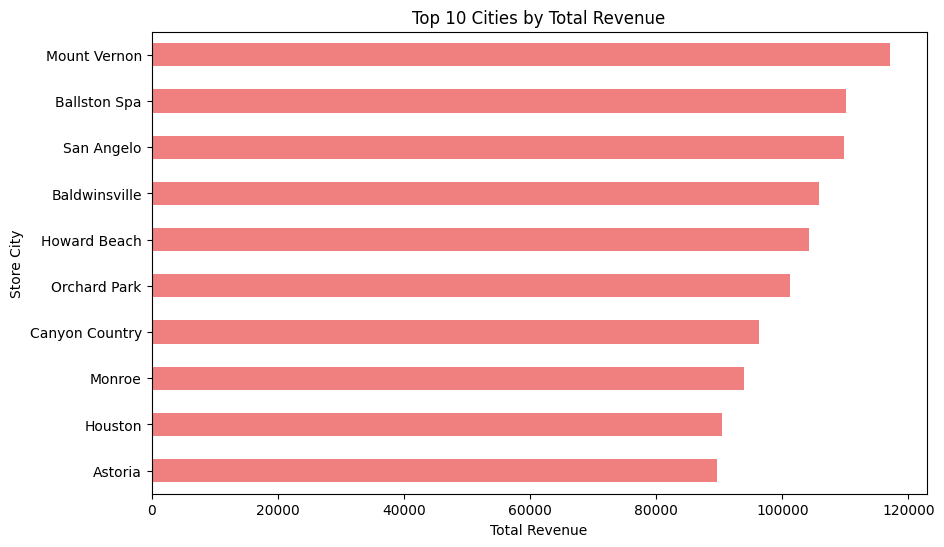

In [345]:
plt.figure(figsize=(10, 6))
rev_by_city.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Top 10 Cities by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Store City')
plt.show()

#
 •	What are the Percentages of Store States regarding Revenue?

In [346]:
rev_by_state = data.groupby('state')['revenue'].sum()
rev_by_state

state
California    1790145.91
New York      5826242.21
Texas          962600.76
Name: revenue, dtype: float64

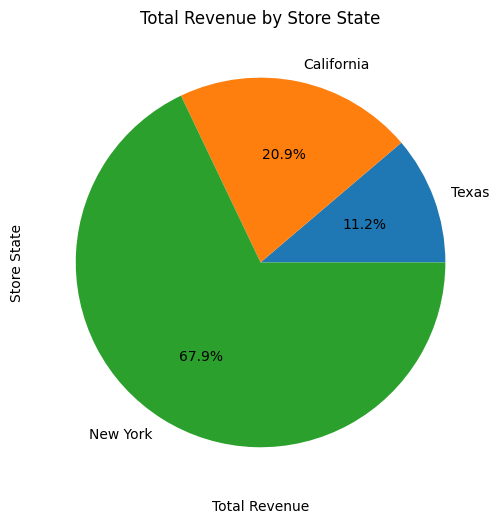

In [347]:
plt.figure(figsize=(10, 6))
rev_by_state.sort_values().plot(kind='pie', color=['lightcoral', 'pink', 'blue'],  autopct='%1.1f%%')
plt.title('Total Revenue by Store State')
plt.xlabel('Total Revenue')
plt.ylabel('Store State')
plt.show()

#
 •	What are the most popular products in terms of units purchased?

In [348]:
# Top 10 products 
prod_by_units = data.groupby('product_name')['total_units'].sum().sort_values(ascending=False).head(10)
prod_by_units

product_name
Electra Cruiser 1 (24-Inch) - 2016               296
Electra Townie Original 7D EQ - 2016             290
Electra Townie Original 21D - 2016               289
Electra Girl's Hawaii 1 (16-inch) - 2015/2016    269
Surly Ice Cream Truck Frameset - 2016            167
Electra Girl's Hawaii 1 (20-inch) - 2015/2016    154
Trek Slash 8 27.5 - 2016                         154
Surly Straggler 650b - 2016                      151
Electra Townie Original 7D - 2015/2016           148
Surly Straggler - 2016                           147
Name: total_units, dtype: int64

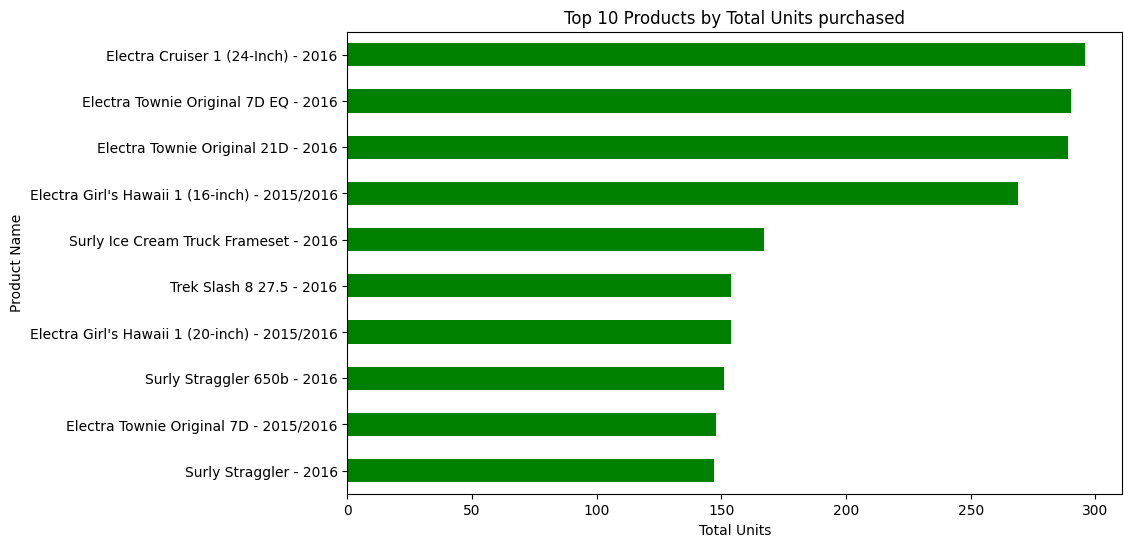

In [349]:
plt.figure(figsize=(10, 6))
prod_by_units.sort_values().plot(kind='barh', color='green')
plt.title('Top 10 Products by Total Units purchased')
plt.xlabel('Total Units')
plt.ylabel('Product Name')
plt.show()

#
•	What are the Top 10 popular products in terms of revenue?

In [350]:
prod_by_revenue = data.groupby('product_name')['revenue'].sum().sort_values(ascending=False).head(10)
prod_by_revenue

product_name
Trek Slash 8 27.5 - 2016                 615998.46
Trek Conduit+ - 2016                     434998.55
Trek Fuel EX 8 29 - 2016                 414698.57
Surly Straggler 650b - 2016              253829.49
Trek Domane SLR 6 Disc - 2017            236499.57
Surly Straggler - 2016                   227703.00
Trek Remedy 29 Carbon Frameset - 2016    224998.75
Trek Powerfly 8 FS Plus - 2017           204999.59
Trek Madone 9.2 - 2017                   194999.61
Trek Silque SLR 8 Women's - 2017         188499.71
Name: revenue, dtype: float64

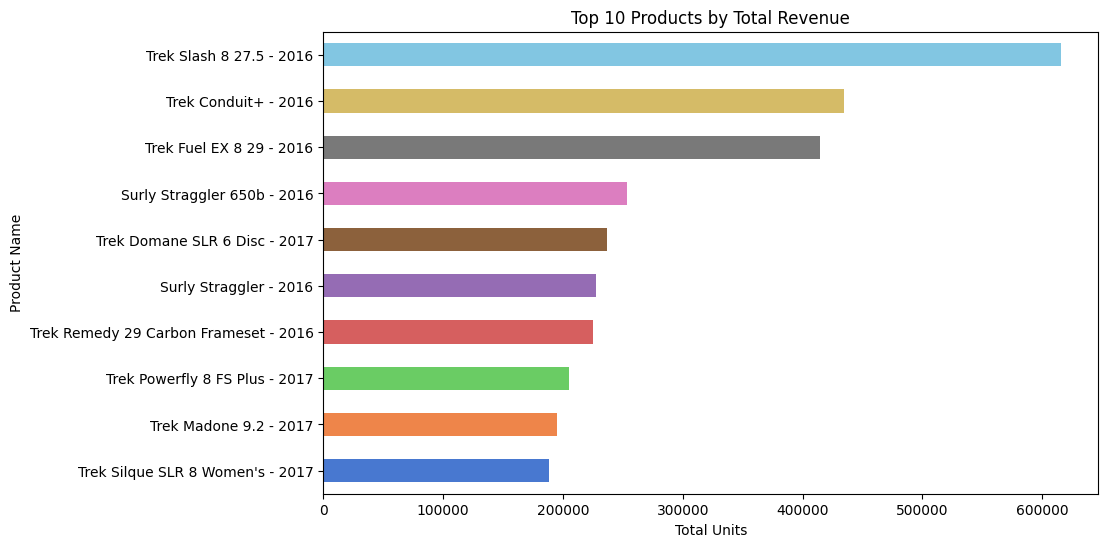

In [351]:
plt.figure(figsize=(10, 6))
prod_by_revenue.sort_values().plot(kind='barh', color=sns.color_palette("muted"))
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Total Units')
plt.ylabel('Product Name')
plt.show()

#
•	What is the Top popular product in terms of revenue generated each year?

In [352]:
# top product by total revenue for each year
revenue_by_product = data.groupby(['Year', 'product_name'])['revenue'].sum().reset_index()
revenue_by_product

,Year,product_name,revenue
0,2016,Electra Cruiser 1 (24-Inch) - 2016,63987.63
1,2016,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,55617.94
2,2016,Electra Girl's Hawaii 1 (20-inch) - 2015/2016,35698.81
3,2016,Electra Moto 1 - 2016,53528.99
4,2016,Electra Townie Original 21D - 2016,119347.83
...,...,...,...
391,2018,Trek X-Caliber 8 - 2017,4999.95
392,2018,Trek X-Caliber 8 - 2018,2999.97
393,2018,Trek X-Caliber Frameset - 2018,5999.96
394,2018,Trek XM700+ - 2018,27999.92


In [353]:
top_products = revenue_by_product.loc[revenue_by_product.groupby('Year')['revenue'].idxmax()]
top_products

,Year,product_name,revenue
20,2016,Trek Slash 8 27.5 - 2016,463998.84
99,2017,Trek Domane SLR 6 Disc - 2017,219999.60
314,2018,Trek Domane SLR 9 Disc - 2018,59999.95


<Figure size 1200x600 with 0 Axes>

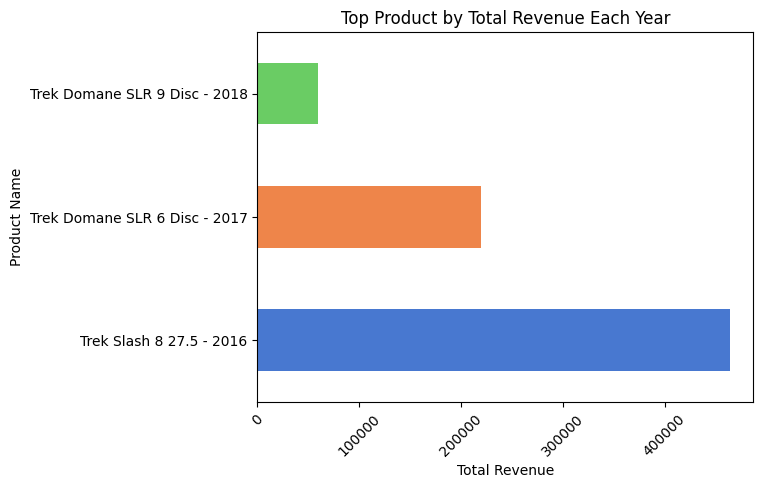

In [354]:
plt.figure(figsize=(12, 6))
top_products.sort_values(by='Year').plot(kind='barh', x='product_name', y='revenue', color=sns.color_palette("muted"), legend=False)
plt.title('Top Product by Total Revenue Each Year')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.xticks(rotation=45)
plt.show()

#
•	What is the Distribution of Revenue generated each year?

In [355]:
# Average total revenue each Year
avg_rev_by_year = data.groupby('Year')['revenue'].mean()
avg_rev_by_year

Year
2016    1528.192030
2017    1857.736725
2018    2302.604539
Name: revenue, dtype: float64

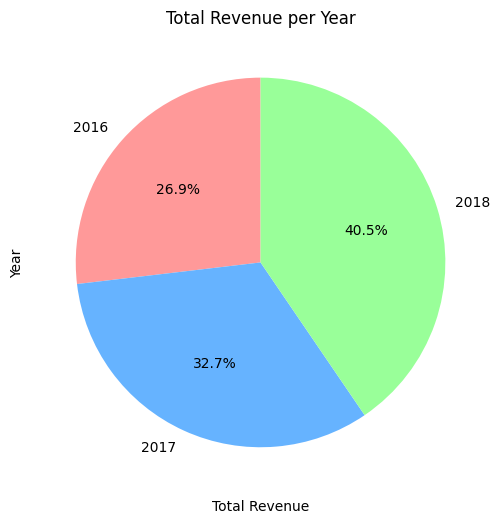

In [356]:
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

plt.figure(figsize=(10, 6))
avg_rev_by_year.sort_values().plot(kind='pie', colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Total Revenue per Year')
plt.xlabel('Total Revenue')
plt.ylabel('Year')
plt.show()

#
•	Who are the Top Customers contributed to Highest Revenue each year?

In [357]:
revenue_by_customer = data.groupby(['Year', 'customers'])['revenue'].sum().reset_index()
revenue_by_customer

,Year,customers,revenue
0,2016,Aaron Knapp,6248.98
1,2016,Abbey Pugh,4778.99
2,2016,Adam Thornton,6148.97
3,2016,Adelaida Hancock,10046.97
4,2016,Adelle Larsen,5339.96
...,...,...,...
1574,2018,Yuk Vega,8597.94
1575,2018,Zelma Browning,11997.98
1576,2018,Zenia Bruce,1119.98
1577,2018,Zina Bonner,4799.97


In [358]:
#top customer for each year
top_customers = revenue_by_customer.loc[revenue_by_customer.groupby('Year')['revenue'].idxmax()]
top_customers

,Year,customers,revenue
171,2016,Dorthea Walker,15059.94
1074,2017,Melanie Hayes,29150.91
1508,2018,Pamelia Newman,35352.86


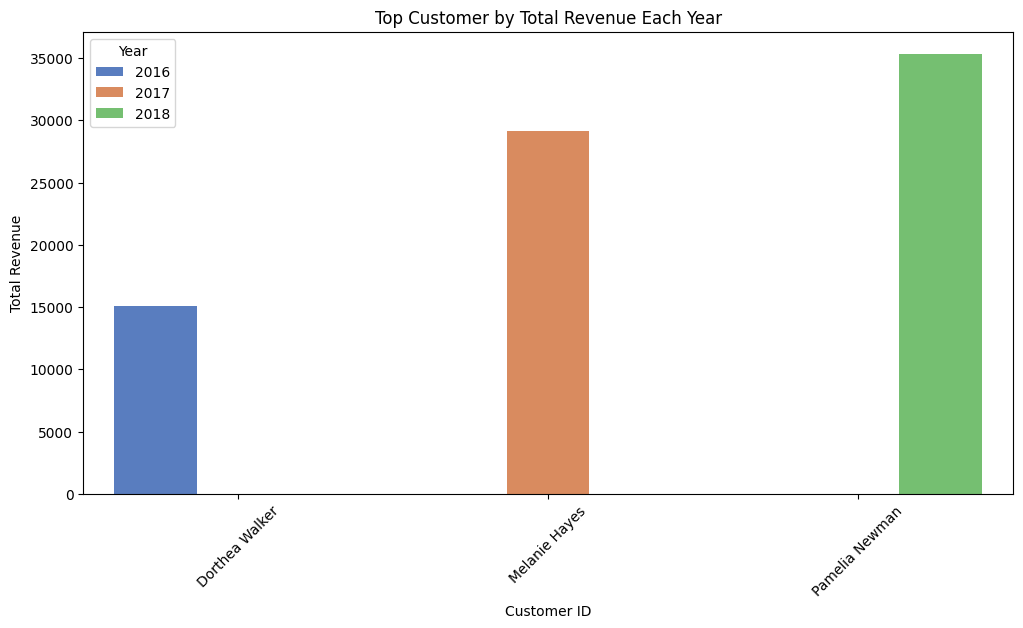

In [359]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_customers, x='customers', y='revenue', hue='Year', palette='muted')
plt.title('Top Customer by Total Revenue Each Year')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()

#
•	What are the months that have the maximum revenue?

In [360]:
revenue_by_month = data.groupby('Month')['revenue'].sum().sort_values(ascending=False)
revenue_by_month

Month
April        1350508.59
January       984440.64
March         957035.47
February      748450.01
June          651222.35
September     642621.25
August        585941.06
October       584587.89
November      533476.07
May           526455.79
December      522718.03
July          491531.73
Name: revenue, dtype: float64

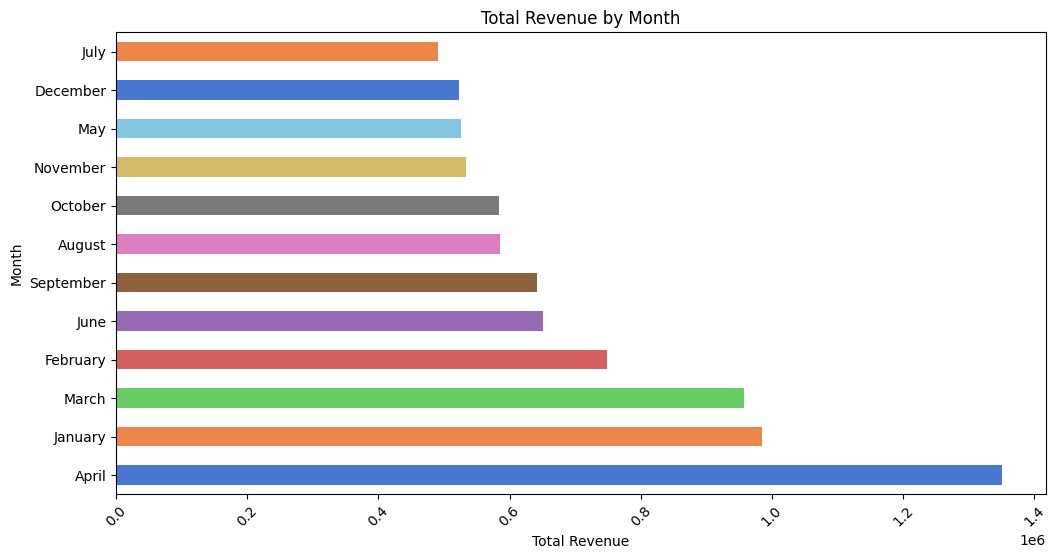

In [361]:
plt.figure(figsize=(12, 6))
revenue_by_month.plot(kind='barh', x='Month', y='revenue', color=sns.color_palette("muted"), legend=False)
plt.title('Total Revenue by Month')
plt.xlabel('Total Revenue')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.show()

#
•	Which sales representatives and stores are top performers?

In [362]:
sales_rep_by_rev= data.groupby('sales_representative')['revenue'].mean().reset_index()
sales_rep_by_rev = sales_rep_by_rev.sort_values(by='revenue', ascending=False)
sales_rep_by_rev

,sales_representative,revenue
1,Kali Vargas,1920.799888
5,Venita Daniel,1827.438911
3,Marcelene Boyer,1819.745344
4,Mireya Copeland,1812.605303
2,Layla Terrell,1769.466627
0,Genna Serrano,1751.327684


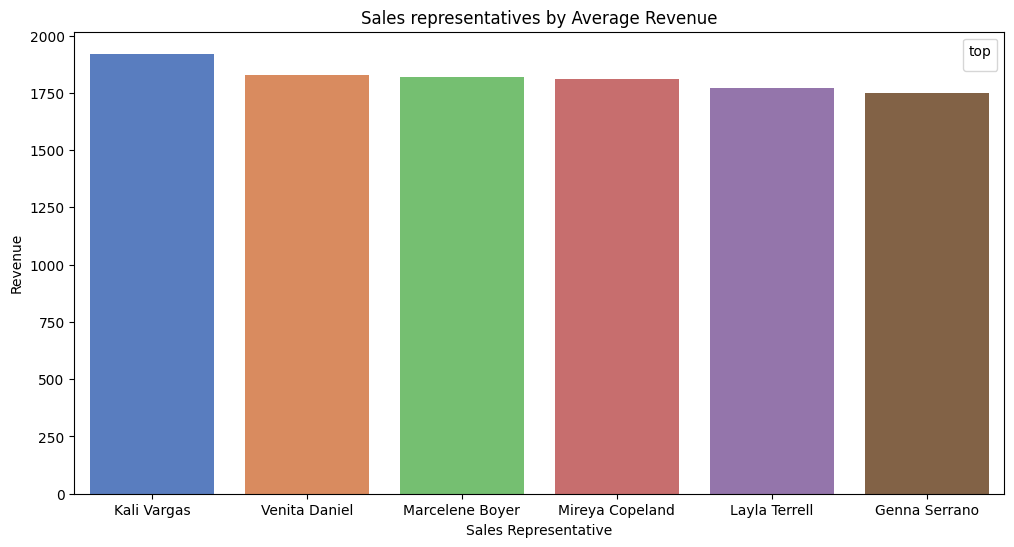

In [363]:
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_rep_by_rev,x='sales_representative', y='revenue' , palette='muted')
plt.title('Sales representatives by Average Revenue')
plt.ylabel('Revenue')
plt.xlabel('Sales Representative')
plt.legend(title='top')
plt.show()

In [364]:
data['store_name'].unique().tolist()

['Santa Cruz Bikes', 'Baldwin Bikes', 'Rowlett Bikes']

In [365]:
revenue_by_store = data.groupby('store_name')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False)
revenue_by_store

,store_name,revenue
0,Baldwin Bikes,5826242.21
2,Santa Cruz Bikes,1790145.91
1,Rowlett Bikes,962600.76


<Figure size 1200x600 with 0 Axes>

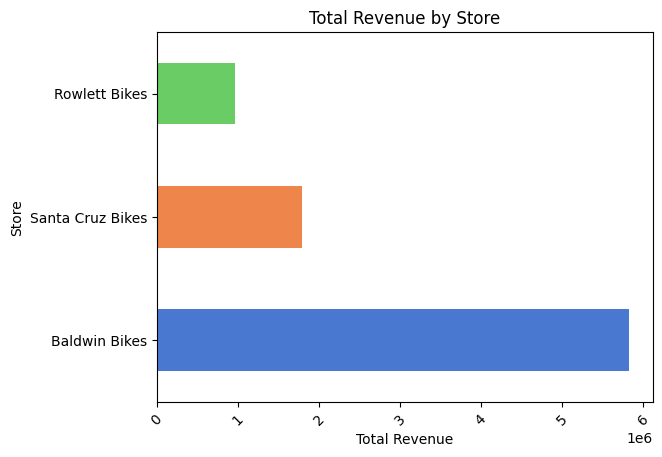

In [366]:
plt.figure(figsize=(12, 6))
revenue_by_store.plot(kind='barh', x='store_name', y='revenue', color=sns.color_palette("muted"), legend=False)
plt.title('Total Revenue by Store')
plt.xlabel('Total Revenue')
plt.ylabel('Store')
plt.xticks(rotation=45)
plt.show()

#
•	What seasonal trends can be observed in the sales data?

In [367]:
total_revenue_by_year = data.groupby('Year')['revenue'].sum().reset_index()
total_revenue_by_year

,Year,revenue
0,2016,2709484.47
1,2017,3845515.02
2,2018,2023989.39


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


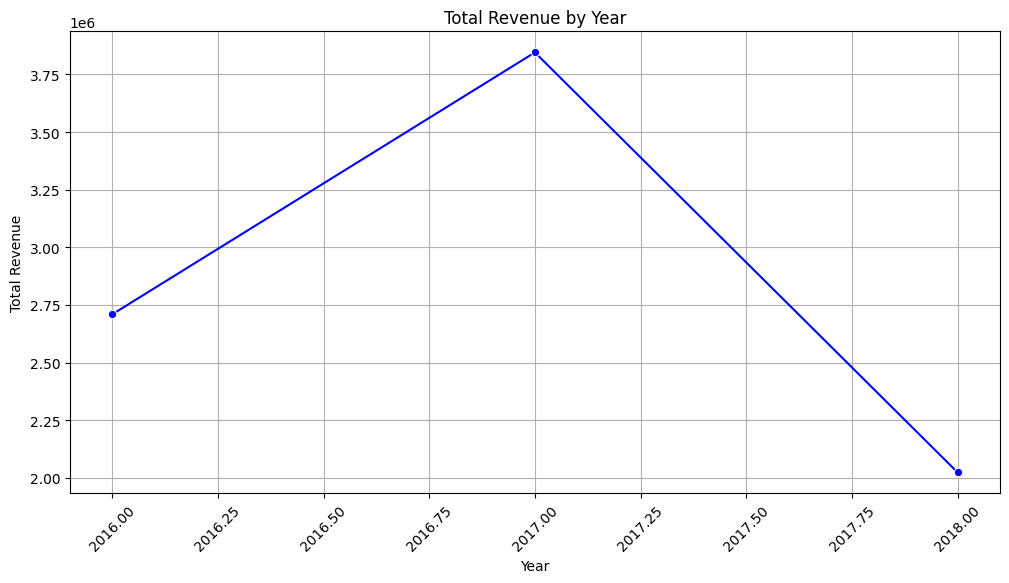

In [368]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_revenue_by_year, x='Year', y='revenue', marker='o', color='blue')
plt.title('Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better visibility
plt.grid(True)  # Optional: Add grid for better readability
plt.show()

In [369]:
total_revenue_by_year_month = data.groupby(['Year', 'Month'])['revenue'].sum().reset_index()

total_revenue_by_year_month['Month'] = pd.Categorical(total_revenue_by_year_month['Month'],
                                                        categories=[
                                                            'January', 'February', 'March', 'April',
                                                            'May', 'June', 'July', 'August', 'September',
                                                            'October', 'November', 'December'], 
                                                        ordered=True)


In [370]:
total_revenue_by_year_month = total_revenue_by_year_month.sort_values(by=['Year', 'Month'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

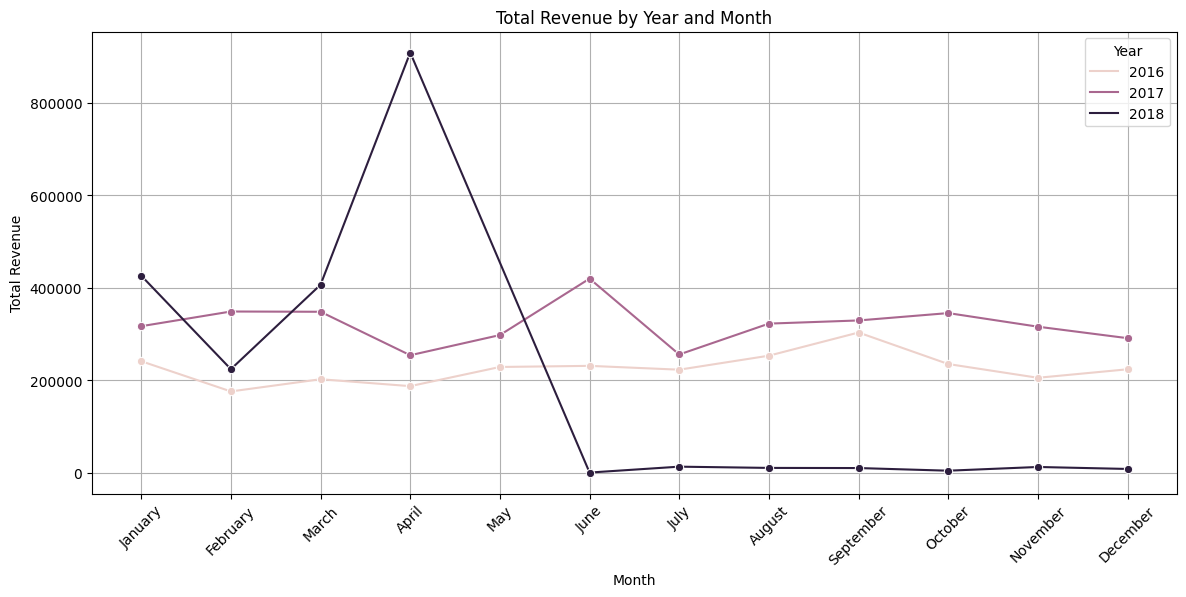

In [371]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=total_revenue_by_year_month, x='Month', y='revenue', hue='Year', marker='o')
plt.title('Total Revenue by Year and Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  
plt.grid(True) 
plt.legend(title='Year')
plt.show()

In [372]:
data.to_csv('Bike-Store-Analysis.csv', index=False)